# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report


2023-04-15 06:55:10.963106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 06:55:11.306692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-15 06:55:11.306716: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-15 06:55:12.458682: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Data Preprocessing
#### Load the data

In [ ]:
df = pd.read_csv('task 1.csv')

#### Encode the data categorically and remove the columns that are not useful for the classification task

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_cols = ['browser', 'os', 'locale', 'location']
ohe.fit(df[categorical_cols])
X_ohe = ohe.transform(df[categorical_cols])
X_num = df.drop(['user_id', 'date', 'time', 'sites', 'index'] + categorical_cols, axis=1)
X = pd.concat([pd.DataFrame(X_ohe, columns=ohe.get_feature_names_out()), X_num], axis=1)
y = df['user_id'].apply(lambda x: 1 if x == 0 else 0)

X

browser_Chrome  browser_Firefox  browser_Internet Explorer  \
0                 0.0              1.0                        0.0   
1                 0.0              0.0                        1.0   
2                 0.0              0.0                        1.0   
3                 0.0              0.0                        1.0   
4                 0.0              0.0                        1.0   
...               ...              ...                        ...   
20396             0.0              0.0                        0.0   
20397             1.0              0.0                        0.0   
20398             1.0              0.0                        0.0   
20399             0.0              1.0                        0.0   
20400             1.0              0.0                        0.0   

       browser_Safari  os_Debian  os_MacOS  os_Ubuntu  os_Windows 10  \
0                 0.0        0.0       0.0        0.0            1.0   
1                 0.0        0.0       0.0        0.0            0.0   
2                 0.0        0.0       1.0        0.0            0.0   
3                 0.0        0.0       0.0        1.0            0.0   
4                 0.0        0.0       0.0        0.0            0.0   
...               ...        ...       ...        ...            ...   
20396             1.0        0.0       0.0        0.0            1.0   
20397             0.0        1.0       0.0        0.0            0.0   
20398             0.0        0.0       0.0        0.0            1.0   
20399             0.0        0.0       0.0        1.0            0.0   
20400             0.0        0.0       0.0        1.0            0.0   

       os_Windows 7  os_Windows 8  ...  location_Netherlands/Amsterdam  \
0               0.0           0.0  ...                             0.0   
1               0.0           1.0  ...                             0.0   
2               0.0           0.0  ...                             0.0   
3               0.0           0.0  ...                             0.0   
4               0.0           1.0  ...                             0.0   
...             ...           ...  ...                             ...   
20396           0.0           0.0  ...                             0.0   
20397           0.0           0.0  ...                             0.0   
20398           0.0           0.0  ...                             0.0   
20399           0.0           0.0  ...                             0.0   
20400           0.0           0.0  ...                             0.0   

       location_New Zealand/Auckland  location_Russia/Moscow  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   
...                              ...                     ...   
20396                            0.0                     0.0   
20397                            0.0                     0.0   
20398                            0.0                     0.0   
20399                            0.0                     0.0   
20400                            0.0                     0.0   

       location_Singapore/Singapore  location_Spain/Madrid  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                               0.0                    0.0   
3                               0.0                    0.0   
4                               0.0                    0.0   
...                             ...                    ...   
20396                           0.0                    0.0   
20397                           0.0                    0.0   
20398                           0.0                    0.0   
20399                           0.0

#### Train-test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

### Build and evaluate model

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test).round()
print(classification_report(y_test, y_pred))

2023-04-15 06:55:14.390563: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-15 06:55:14.391266: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-15 06:55:14.391313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pici): /proc/driver/nvidia/version does not exist
2023-04-15 06:55:14.392876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
510/510 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.9803 - val_loss: 0.0169 - val_accuracy: 0.9939
Epoch 2/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.0050 - val_accuracy: 0.9995
Epoch 3/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 4/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 5/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 6/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 7/50
510/510 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 

### Predict on verification data

In [ ]:
df_verify = pd.read_csv('task_1_verify.csv')
X_verify_ohe = ohe.transform(df_verify[categorical_cols])
X_verify_num = df_verify.drop(['date', 'time', 'sites'] + categorical_cols, axis=1)
X_verify = pd.concat([pd.DataFrame(X_verify_ohe, columns=ohe.get_feature_names()), X_verify_num], axis=1)
y_verify_pred = model.predict(X_verify).round()
for idx, pred in enumerate(y_verify_pred):
    print(f"{idx}: {int(pred[0])}")

2/2 [==============================] - 0s 2ms/step
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 1
32: 1
33: 1
34: 1
35: 1


/home/karina/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Questions
1. Did you find any usefull insights from your data analysis?
    - *Answer*
2. What preprocessing techniques did you use? Why?
    - *Answer*
3. Describe the fine-tuning process and how you reached your model architecture.
    - *Answer*
4. Which metric did you try to optemize for this task? Why?
    - *Answer*

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from time import time
import zipfile
import pathlib

import matplotlib.pyplot as plt
from pandas.core.common import flatten
import copy
import numpy as np
import random

import torch
from torch import nn
from torch import optim
from torch import Tensor
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as tf
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets

from typing import Type

import cv2

import glob
from tqdm import tqdm
import os
from PIL import Image

### Main variables

In [3]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j -O "task 2.zip"

     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     -------- ------------------------------ 30.7/143.0 kB 1.3 MB/s eta 0:00:01
     --------------------- --------------- 81.9/143.0 kB 919.0 kB/s eta 0:00:01
     --------------------------------- -- 133.1/143.0 kB 983.0 kB/s eta 0:00:01
     -------------------------------------- 143.0/143.0 kB 1.1 MB/s eta 0:00:00
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


Downloading...
From (uriginal): https://drive.google.com/uc?id=1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j
From (redirected): https://drive.google.com/uc?id=1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j&confirm=t&uuid=db82d9c0-b9bd-40c1-bce1-d6dc10564fb3
To: c:\Users\hp\Desktop\Progs\ML\Assignment 2\task 2.zip

  0%|          | 0.00/254M [00:00<?, ?B/s]
  0%|          | 524k/254M [00:00<01:10, 3.58MB/s]
  1%|          | 2.62M/254M [00:00<00:24, 10.3MB/s]
  1%|▏         | 3.67M/254M [00:00<00:25, 9.87MB/s]
  3%|▎         | 6.82M/254M [00:00<00:15, 15.7MB/s]
  4%|▍         | 11.0M/254M [00:00<00:10, 22.2MB/s]
  6%|▌         | 15.2M/254M [00:00<00:09, 25.9MB/s]
  8%|▊         | 19.4M/254M [00:00<00:07, 29.7MB/s]
  9%|▉         | 23.1M/254M [00:00<00:07, 31.4MB/s]
 11%|█         | 26.7M/254M [00:01<00:07, 30.2MB/s]
 12%|█▏        | 29.9M/254M [00:01<00:07, 29.1MB/s]
 13%|█▎        | 33.0M/254M [00:01<00:07, 28.2MB/s]
 14%|█▍        | 36.2M/254M [00:01<00:07, 28.8MB/s]
 16%|█▌        | 40.4M/254M [00:01<00:06, 3

In [4]:
num_epochs = 3

train_data_path = 'train/' 
test_data_path = 'content/test/'


### Function that add .bmp extension to data

In [5]:
def add_extension(path):
    for filename in os.listdir(path):
        if os.path.isfile(os.path.join(path, filename)):
            if not filename.endswith(".bmp"):
                new_file_path = os.path.join(path, filename + '.bmp')
                os.rename(os.path.join(path, filename), new_file_path)

### Unzip archive with data

In [6]:
with zipfile.ZipFile('task 2.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('test.zip', 'r') as zip_ref:
    zip_ref.extractall()    

### Define data transform for image preprocessing and augmentation

In [7]:
train_transforms = tf.Compose(
    [
        # A.SmallestMaxSize(max_size=350),
        # A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=0.5),
        # A.RandomCrop(height=256, width=256),
        # A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        # A.RandomBrightnessContrast(p=0.5),
        # A.MultiplicativeNoise(multiplier=[0.5,2], per_channel=True, p=0.2),
        # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        # A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
        # A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
        tf.Resize(size=(100, 100)),
        tf.ToTensor()
    ]
)

test_transforms = tf.Compose(
    [
        tf.Resize(size=(100, 100)),
        tf.ToTensor()
        # A.SmallestMaxSize(max_size=350),
        # A.CenterCrop(height=256, width=256),
        # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        # ToTensorV2(),
    ]
)

### Defining dataset

In [8]:
add_extension(test_data_path)

train_image_paths = [] 


for filename in os.listdir(train_data_path):
    if os.path.isfile(os.path.join(train_data_path, filename)):
        train_image_paths.append(os.path.join(train_data_path, filename))
    
train_image_paths = list(flatten(train_image_paths))
# random.shuffle(train_image_paths)

print('train_image_path example: ', train_image_paths[0])


train_image_paths, valid_image_paths = train_image_paths[:int(0.8*len(train_image_paths))], train_image_paths[int(0.8*len(train_image_paths)):] 


test_image_paths = []

for filename in os.listdir(test_data_path):
    if os.path.isfile(os.path.join(test_data_path, filename)):
        test_image_paths.append(os.path.join(test_data_path, filename))

test_image_paths = list(flatten(test_image_paths))   

print("Train size: {}\nValid size: {}\n Test size: {}".format(len(train_image_paths), len(valid_image_paths), len(test_image_paths) ))


train_image_path example:  train/10000_2.bmp
Train size: 15530
Valid size: 3883
 Test size: 14272


In [9]:
class FingerPrintDataset(Dataset):
    def __init__(self, image_paths, transform=ToTensor()):
        ##### transform = False
        self.image_paths = image_paths
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        img = Image.open(image_filepath)
        
        label = int(image_filepath[-5])
        if self.transform is not None:
            img = self.transform(img)
        
        return img, label
    


train_dataset = FingerPrintDataset(train_image_paths,train_transforms)
valid_dataset = FingerPrintDataset(valid_image_paths,test_transforms)
test_dataset = FingerPrintDataset(test_image_paths,test_transforms)

In [10]:
# def visualize_augmentations(dataset, idx=0, samples=10, cols=5, random_img = False):
    
#     dataset = copy.deepcopy(dataset)
#     dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
#     rows = samples // cols
    
        
#     figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
#     for i in range(samples):
#         if random_img:
#             idx = np.random.randint(1,len(train_image_paths))
#         image, lab = dataset[idx]
#         ax.ravel()[i].imshow(image)
#         ax.ravel()[i].set_axis_off()
#         ax.ravel()[i].set_title(lab)
#     plt.tight_layout(pad=1)
#     plt.show()    

# visualize_augmentations(train_dataset,np.random.randint(1,len(train_image_paths)), random_img = True)


In [11]:
train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

valid_loader = DataLoader(
    valid_dataset, batch_size=64, shuffle=True
)


test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False
)

In [12]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Building CNN model

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(20000, 10)

    def forward(self, x):
        x = self.conv1(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization


In [14]:
class BasicBlock(nn.Module):
    def __init__(
        self, 
        in_channels: int,
        out_channels: int,
        stride: int = 1,
        expansion: int = 1,
        downsample: nn.Module = None
    ) -> None:
        super(BasicBlock, self).__init__()
        # Multiplicative factor for the subsequent conv2d layer's output channels.
        # It is 1 for ResNet18 and ResNet34.
        self.expansion = expansion
        self.downsample = downsample
        self.conv1 = nn.Conv2d(
            in_channels, 
            out_channels, 
            kernel_size=3, 
            stride=stride, 
            padding=1,
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(
            out_channels, 
            out_channels*self.expansion, 
            kernel_size=3, 
            padding=1,
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(out_channels*self.expansion)
    def forward(self, x: Tensor) -> Tensor:
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return  out

In [15]:
class ResNet(nn.Module):
    def __init__(
        self, 
        img_channels: int,
        num_layers: int,
        block: Type[BasicBlock],
        num_classes: int  = 1000
    ) -> None:
        super(ResNet, self).__init__()
        if num_layers == 18:
            # The following `layers` list defines the number of `BasicBlock` 
            # to use to build the network and how many basic blocks to stack
            # together.
            layers = [2, 2, 2, 2]
            self.expansion = 1
        
        self.in_channels = 64
        # All ResNets (18 to 152) contain a Conv2d => BN => ReLU for the first
        # three layers. Here, kernel size is 7.
        self.conv1 = nn.Conv2d(
            in_channels=img_channels,
            out_channels=self.in_channels,
            kernel_size=7, 
            stride=2,
            padding=3,
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512*self.expansion, num_classes)
    def _make_layer(
        self, 
        block: Type[BasicBlock],
        out_channels: int,
        blocks: int,
        stride: int = 1
    ) -> nn.Sequential:
        downsample = None
        if stride != 1:
            """
            This should pass from `layer2` to `layer4` or 
            when building ResNets50 and above. Section 3.3 of the paper
            Deep Residual Learning for Image Recognition
            (https://arxiv.org/pdf/1512.03385v1.pdf).
            """
            downsample = nn.Sequential(
                nn.Conv2d(
                    self.in_channels, 
                    out_channels*self.expansion,
                    kernel_size=1,
                    stride=stride,
                    bias=False 
                ),
                nn.BatchNorm2d(out_channels * self.expansion),
            )
        layers = []
        layers.append(
            block(
                self.in_channels, out_channels, stride, self.expansion, downsample
            )
        )
        self.in_channels = out_channels * self.expansion
        for i in range(1, blocks):
            layers.append(block(
                self.in_channels,
                out_channels,
                expansion=self.expansion
            ))
        return nn.Sequential(*layers)
    def forward(self, x: Tensor) -> Tensor:
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        # The spatial dimension of the final layer's feature 
        # map should be (7, 7) for all ResNets.
        # print('Dimensions of the last convolutional feature map: ', x.shape)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [16]:
cnn = CNN()
model = models.resnet18(pretrained=True)
resnet = ResNet(img_channels=1, num_layers=18, block=BasicBlock, num_classes=64)
resnet.to(device)

print(resnet)

c:\Users\hp\Desktop\Progs\ML\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hp\Desktop\Progs\ML\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\hp/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 29.6MB/s]


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [18]:
optimizer = optim.Adam(resnet.parameters(), lr = 0.1)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)

In [20]:
def train(num_epochs, cnn, loader, val_loader):

    cnn.train()

    # Train the model
    total_step = len(loader)

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loader):
            images.to(device)
            labels.to(device)

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

       # Evaluate on the validation data
        cnn.eval()
        correct = 0
        total = 0
        for images, labels in val_loader:
            images=images.to(device)
            labels=labels.to(device)
            b_x = (images)   # batch x
            b_y = (labels)   # batch y

            output = cnn(b_x)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print('Epoch [{}/{}], Validation Accuracy: {:.2f}%'.format(epoch+1, num_epochs, accuracy))

        cnn.train()              

train(num_epochs, cnn, train_loader, valid_loader)


Epoch [1/3], Step [1/243], Loss: 2.2969
Epoch [1/3], Step [2/243], Loss: 2.3130
Epoch [1/3], Step [3/243], Loss: 2.3000
Epoch [1/3], Step [4/243], Loss: 2.3207
Epoch [1/3], Step [5/243], Loss: 2.3214
Epoch [1/3], Step [6/243], Loss: 2.3056
Epoch [1/3], Step [7/243], Loss: 2.2998
Epoch [1/3], Step [8/243], Loss: 2.3101
Epoch [1/3], Step [9/243], Loss: 2.2974
Epoch [1/3], Step [10/243], Loss: 2.2939
Epoch [1/3], Step [11/243], Loss: 2.3171
Epoch [1/3], Step [12/243], Loss: 2.3190
Epoch [1/3], Step [13/243], Loss: 2.3340
Epoch [1/3], Step [14/243], Loss: 2.3217
Epoch [1/3], Step [15/243], Loss: 2.2758
Epoch [1/3], Step [16/243], Loss: 2.3202
Epoch [1/3], Step [17/243], Loss: 2.3206
Epoch [1/3], Step [18/243], Loss: 2.2918
Epoch [1/3], Step [19/243], Loss: 2.2898
Epoch [1/3], Step [20/243], Loss: 2.3398
Epoch [1/3], Step [21/243], Loss: 2.3021
Epoch [1/3], Step [22/243], Loss: 2.3119
Epoch [1/3], Step [23/243], Loss: 2.2927
Epoch [1/3], Step [24/243], Loss: 2.3039
Epoch [1/3], Step [25/243

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

### Evaluate the model on test data

In [ ]:
def test(loader):
    # Test the model
    resnet.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loader:
            test_output = resnet(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the test images: %.2f' % accuracy)

test(test_loader)

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
Test Accuracy of the model on the test images: 0.30


### References
1)https://towardsdatascience.com/custom-dataset-in-pytorch-part-1-images-2df3152895 - custom dataset creation
2)

### Questions
1. What preprocessing techniques did you use? Why?
    - *Answer*
2. What data augmentation techniques did you use?
    - *Answer*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *Answer*
4. What techniques did you use to improve model’s performance other than data augmentation
    - *Answer*

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### Load the data

In [ ]:
data = pd.read_csv('loan_data.csv')

### Split the data

In [ ]:
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train DT

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5, 6]}
dt_grid = GridSearchCV(dt, params, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]})

### Train RF

In [ ]:
rf = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 3, 4]}
rf_grid = GridSearchCV(rf, params, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]})

### Compare the performance

In [ ]:
dt_pred = dt_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_pred))
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       372
           1       0.99      0.99      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.98      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



### Decision Tree Visualization

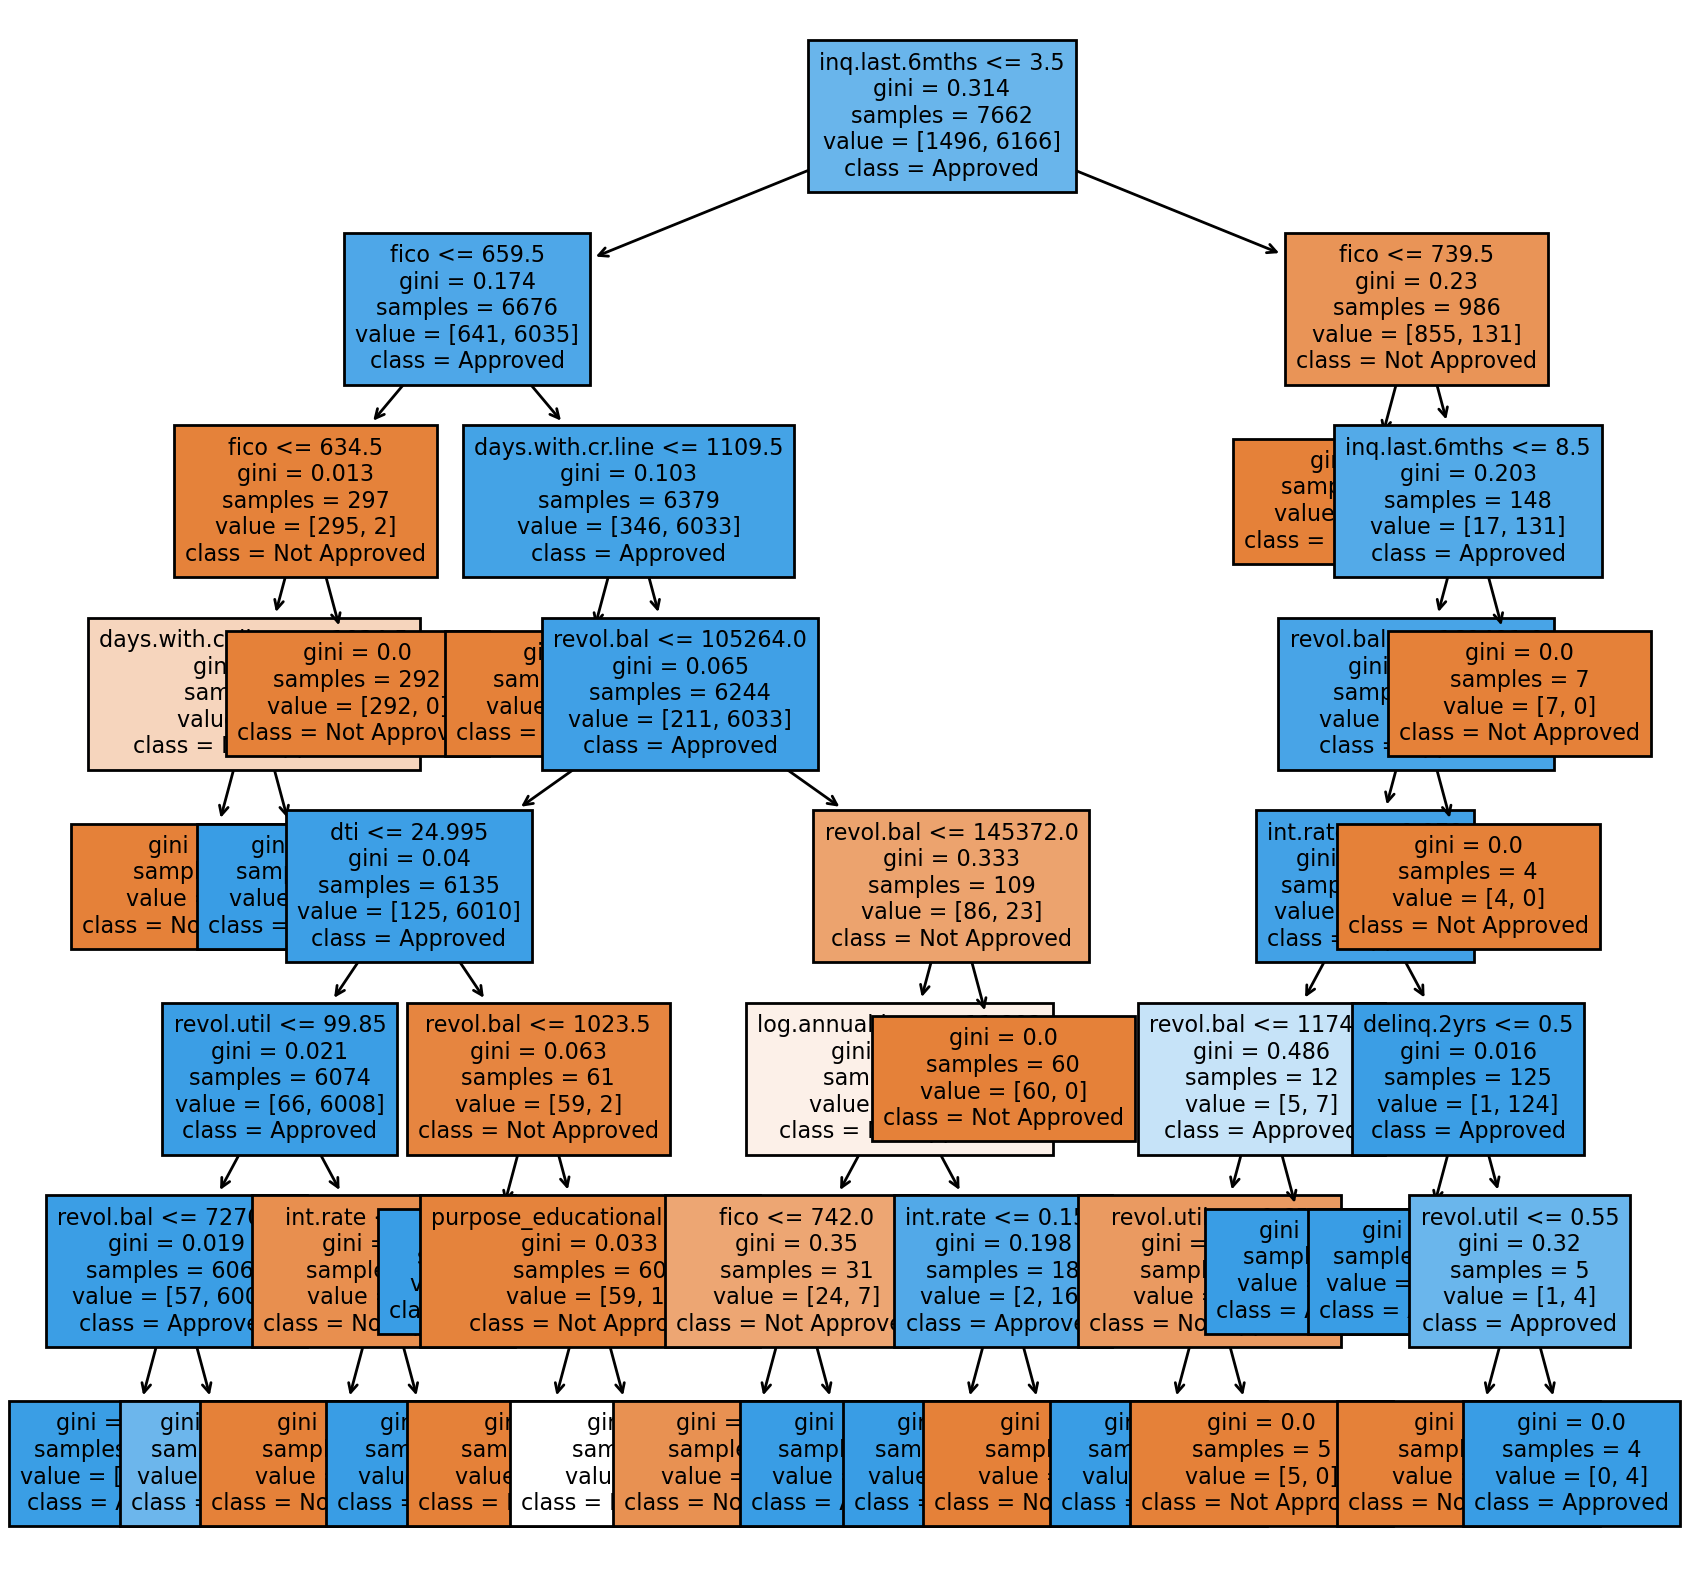

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt_grid.best_estimator_, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, fontsize=8)
plt.show()

### Random Forest Visualization

In [ ]:

plt.figure(figsize=(50,50))
plot_tree(rf_grid.best_estimator_.estimators_[0], feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, fontsize=8)


[Text(0.38065085459499626, 0.9782608695652174, 'days.with.cr.line <= 1109.5\ngini = 0.316\nsamples = 4848\nvalue = [1509, 6153]\nclass = Approved'),
 Text(0.37272417636859057, 0.9347826086956522, 'gini = 0.0\nsamples = 159\nvalue = [261, 0]\nclass = Not Approved'),
 Text(0.388577532821402, 0.9347826086956522, 'fico <= 659.5\ngini = 0.28\nsamples = 4689\nvalue = [1248, 6153]\nclass = Approved'),
 Text(0.22516720336883825, 0.8913043478260869, 'days.with.cr.line <= 1530.021\ngini = 0.006\nsamples = 208\nvalue = [329, 1]\nclass = Not Approved'),
 Text(0.2172405251424325, 0.8478260869565217, 'purpose_debt_consolidation <= 0.5\ngini = 0.083\nsamples = 15\nvalue = [22, 1]\nclass = Not Approved'),
 Text(0.20931384691602675, 0.8043478260869565, 'installment <= 56.32\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Not Approved'),
 Text(0.201387168689621, 0.7608695652173914, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Approved'),
 Text(0.2172405251424325, 0.7608695652173914, 'gini = 0.0\

### Questions
1. How did the DT compare to the RF in performance? Why?
    - *Answer*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *Answer*
3. What is ensemble learning? What are its pros and cons?
    - *Answer*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Answer*